# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

# Libraries importation

In [28]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print('Successful importation')

Successful importation


In [2]:
# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

# Data Exploration

## Data Counting

In [3]:
# Copy of original dataset
RealEstate = data.copy()
RealEstate

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Statistical Measures

In [4]:
# Summarize by column
RealEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
# Statistical summarization by column
RealEstate.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The mean age of the houses is 17 years, and the sd is 11 years, which means that the age of houses spans from 6 to 28 years within one sd.

50% of houses are 16 years or newer, and the oldest house is almost 44 years old. It will be a good idea to check it house age correlates to price (theoretically, the older the house, the more expensive it should be in general, but house's state is also important).

The average distance to the closest light rail station is, on average, over 1 km, but that's only because the max distance is over 6 km. Actually, 50% of the houses are less than 500 m away from the nearest rail station.

I suppose being close to a rail station would be a good feature for house pricing, so later it'll be checked out if pricing goes up as the distance to the nearest rail station goes down.

There's, on average, 4 stores within walking distance, which is also the number of stores that 50% of houses have near. This could indicate a normal distribution, this should be corroborated later.

This is supposed to be a good feature, so, the more stores, the higher the price.

## Month and year features

In [6]:
def month_calc(date):
    year = math.floor(date)
    month = int(
            round(
            (date - year) * 12
        )
    )
    month = 12 if month == 0 else month
    return month

In [7]:
# New column: month
RealEstate['month'] = RealEstate['transaction_date'].map(
    month_calc
)
RealEstate

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,7
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10
...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,12
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,8
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,3
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,12


In [8]:
# New column: year
RealEstate['year'] = RealEstate['transaction_date'].map(
    math.floor
)
RealEstate

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,month,year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,7,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,12,2013
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,8,2012
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,3,2013
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,12,2013


In [9]:
# Change of month = 0 by month = 12, and in that case, year by year - 1
for row in RealEstate.index:
    if RealEstate.loc[row, 'month'] == 12:
        RealEstate.loc[row, 'year'] = RealEstate.loc[row, 'year'] - 1
RealEstate

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,month,year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,7,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,12,2012
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,8,2012
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,3,2013
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,12,2012


This change was necessary because the way the date was presented, all dates that ended with 0 actually represented december of last year.

## Data distributions

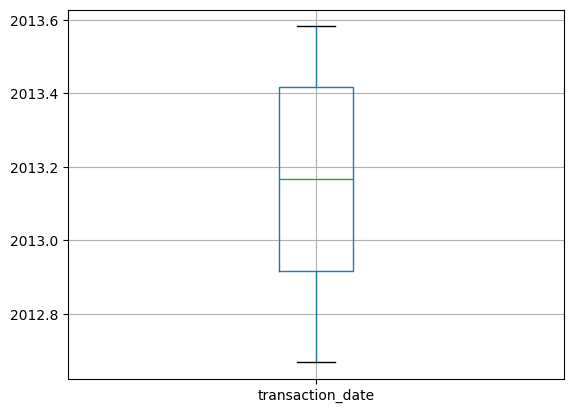

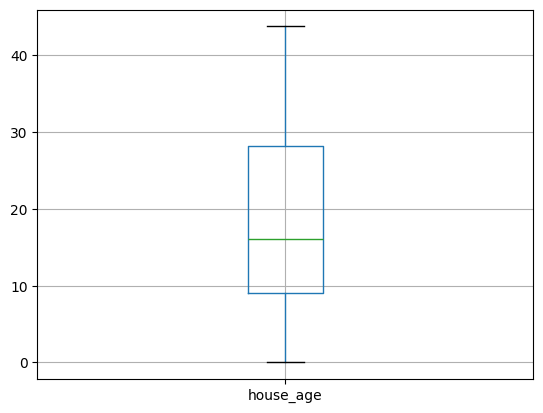

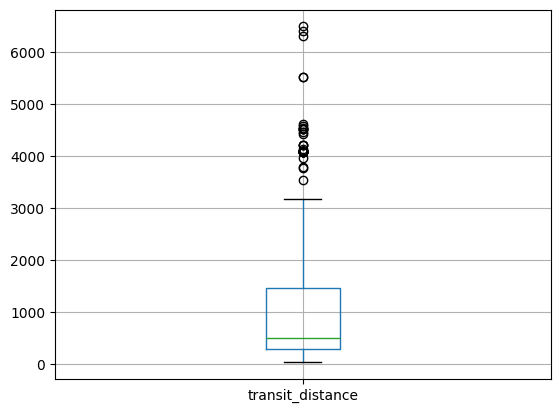

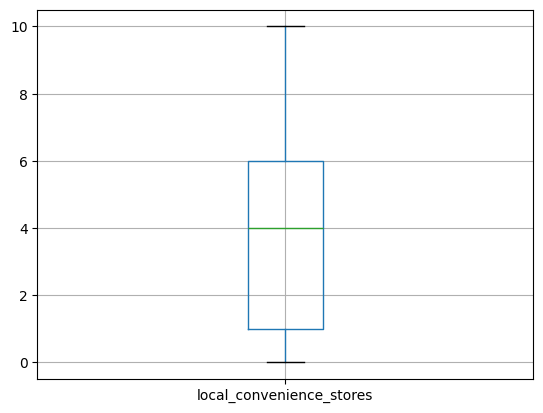

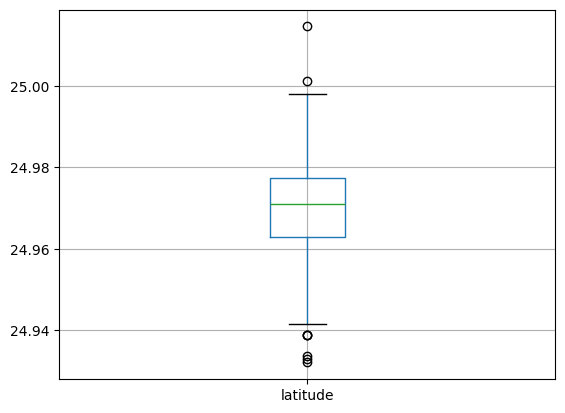

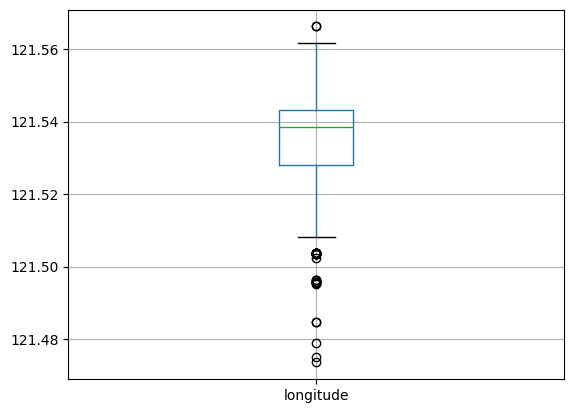

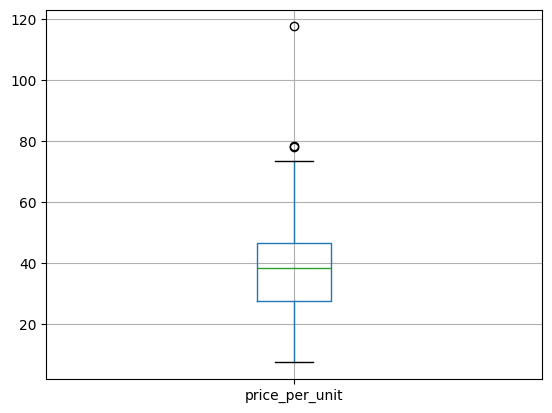

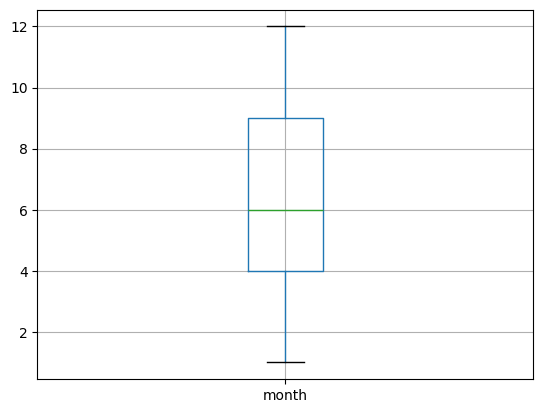

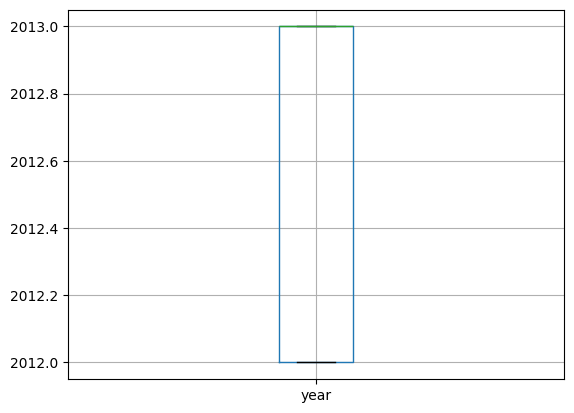

In [10]:
# Boxplot for each feature
for column in RealEstate:
    RealEstate.boxplot(column)
    plt.show()

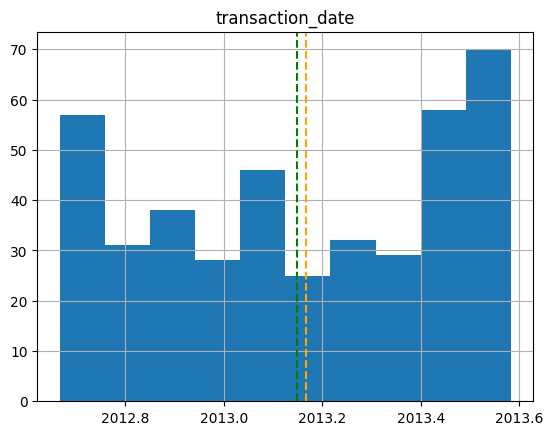

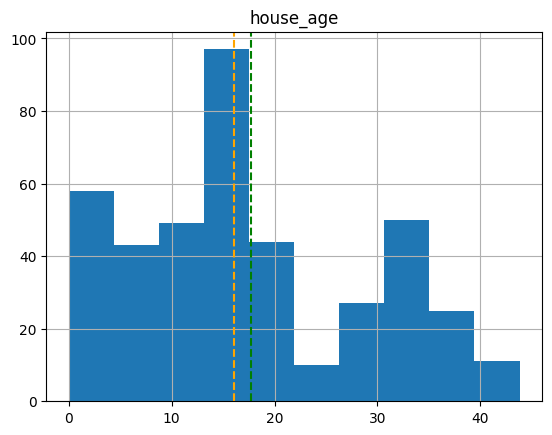

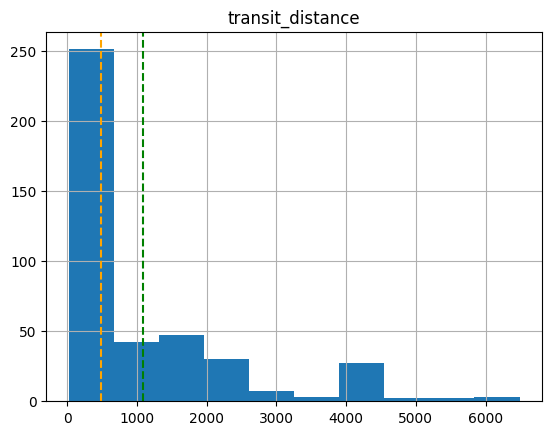

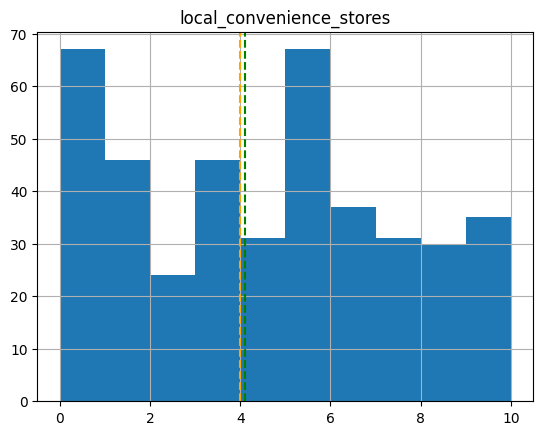

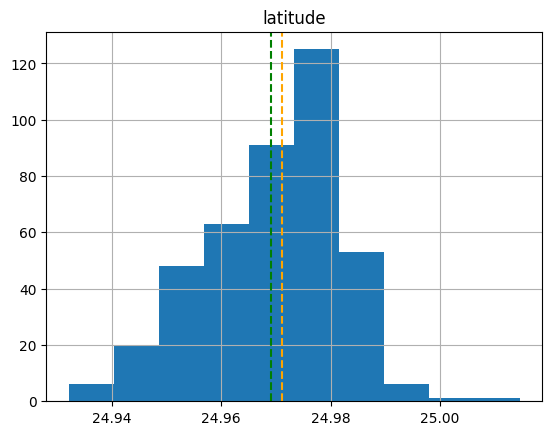

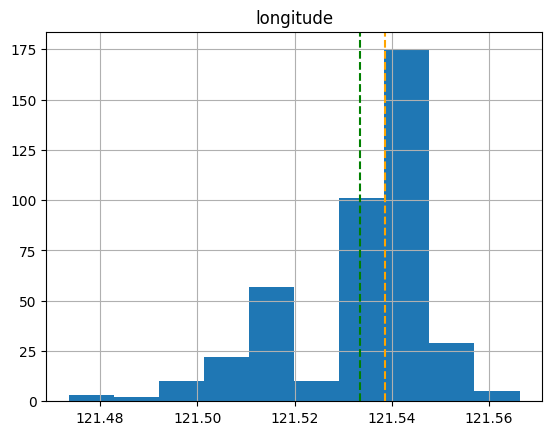

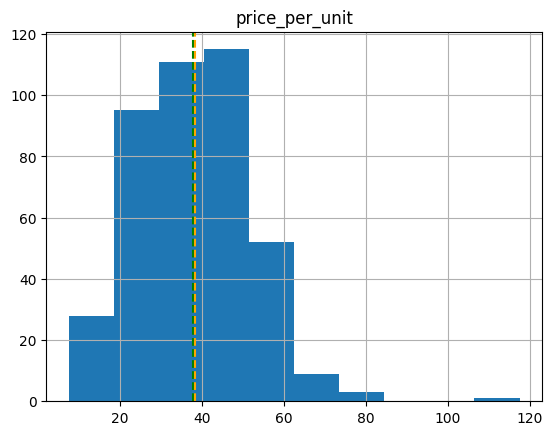

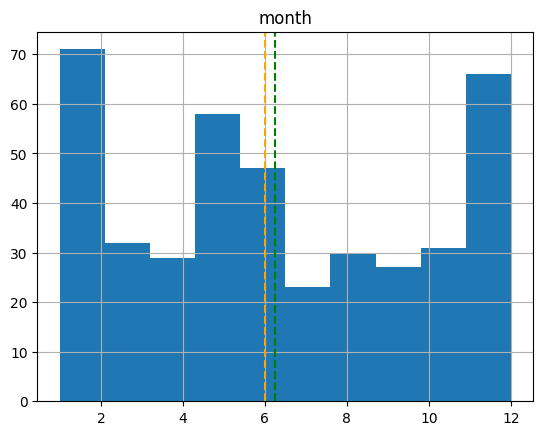

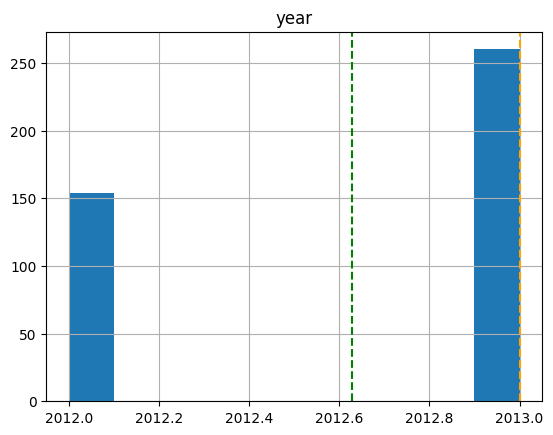

In [11]:
# Distribution plot for each feature
for column in RealEstate:
    RealEstate.hist(column)
    # Mean
    plt.axvline(
        RealEstate[column].mean(),
        linestyle='--',
        color='g'
    )
    # Median
    plt.axvline(
        np.median(RealEstate[column]),
        linestyle='--',
        color='orange'
    )
    plt.show()

Only `price_per_unit` seems to have something of a normal distribution (although there appears to be some outliers). Therefore, the variables will first be _normalized_, and then _scaled_ when preprocessing takes place.

## Scatter plots

### Coordenates

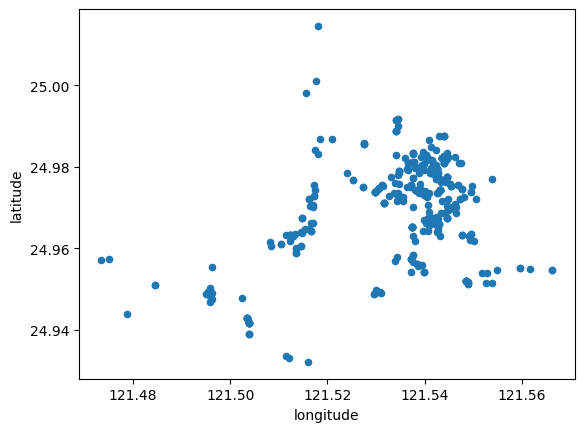

In [12]:
RealEstate.plot.scatter(
    'longitude',
    'latitude'
)
plt.show()

There doesn't seem to be a clear shape that shows where this place is on the map.

In [13]:
RealEstate

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,month,year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,7,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,12,2012
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,8,2012
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,3,2013
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,12,2012


### Numeric features

In [14]:
# Set of numeric features
numeric_features = [
    'house_age',
    'transit_distance',
    'local_convenience_stores',
    'latitude',
    'longitude',
    'month',
    'year'
]
numeric_features

['house_age',
 'transit_distance',
 'local_convenience_stores',
 'latitude',
 'longitude',
 'month',
 'year']

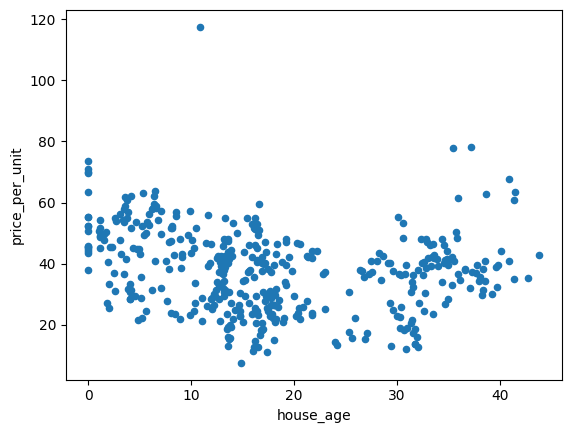

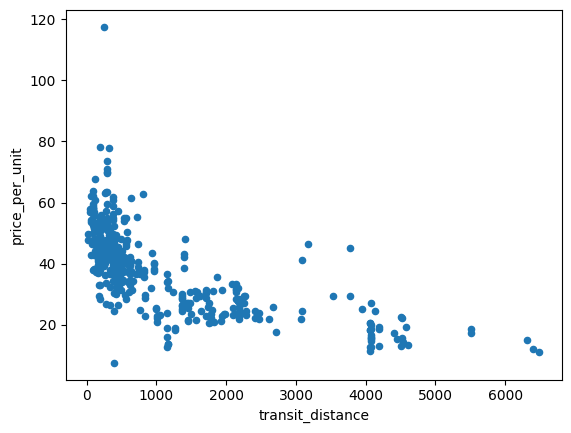

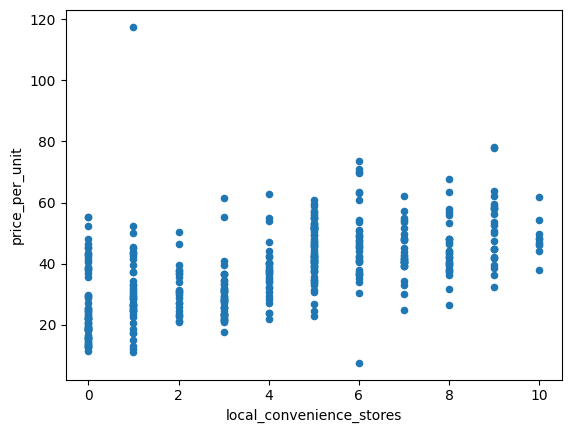

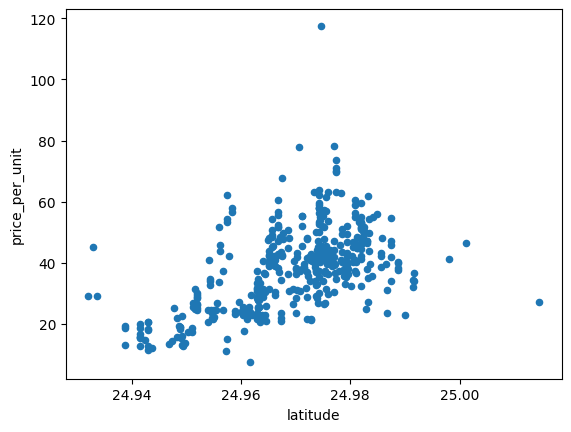

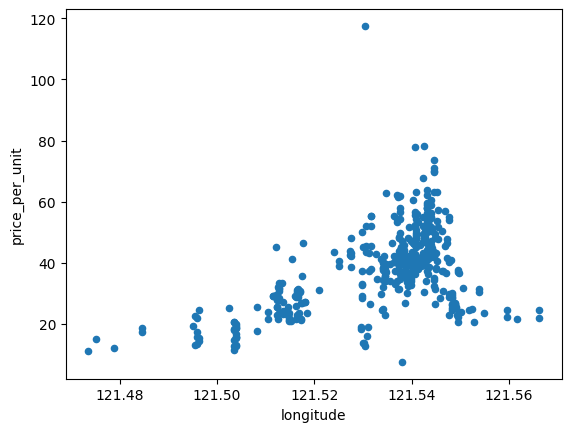

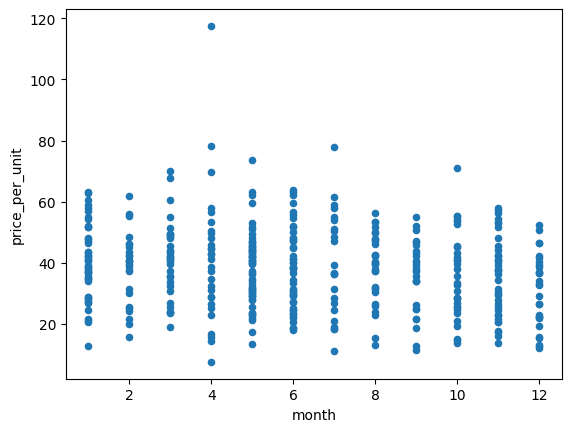

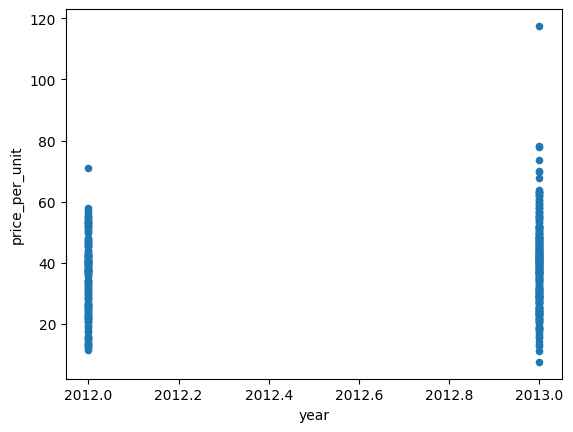

In [15]:
# Scatter plot for each numeric variable
for feature in numeric_features:
    RealEstate.plot.scatter(
        feature,
        'price_per_unit'
    )
    plt.show()

1. There doesn't seem to be a clear relationship between house age and price.
2. A closer distance to the next station seems to have a positive impact on price.
3. Houses with more local convenience stores nearby seem to be a little bit more expensive.

# Preprocessing

Before training a model, certain changes need to be done on variables. The first step will be to _homogenize_ numeric data, meaning that it will be transformed so that their scale and distribution match with each other.

## Data Homogenization

### Normalization

In [16]:
numeric_features_normalized = Normalizer().transform(RealEstate[numeric_features].T)
numeric_features_normalized = numeric_features_normalized.T
numeric_features_normalized

array([[0.0747042 , 0.00250922, 0.0974833 , ..., 0.0491501 , 0.07589998,
        0.04913198],
       [0.04552287, 0.00906368, 0.08773497, ..., 0.0491498 , 0.07589998,
        0.04913198],
       [0.03104893, 0.01661363, 0.04874165, ..., 0.04915158, 0.04829999,
        0.0491564 ],
       ...,
       [0.04388872, 0.01155801, 0.06823831, ..., 0.04914995, 0.0207    ,
        0.0491564 ],
       [0.0189095 , 0.00309844, 0.04874165, ..., 0.04915027, 0.08279998,
        0.04913198],
       [0.01517429, 0.0026741 , 0.08773497, ..., 0.04915126, 0.04139999,
        0.0491564 ]])

The normalizer object actually works on rows instead of columns, so the dataframe needs to be transposed for the transformation, and then transposed back once it gives the result.

### Scaling

In [17]:
numeric_features_scaled = MinMaxScaler().fit_transform(numeric_features_normalized)
numeric_features_scaled

array([[0.73059361, 0.00951267, 1.        , ..., 0.71932284, 0.90909091,
        0.        ],
       [0.44520548, 0.04380939, 0.9       , ..., 0.71145137, 0.90909091,
        0.        ],
       [0.30365297, 0.08331505, 0.5       , ..., 0.75889584, 0.54545455,
        1.        ],
       ...,
       [0.42922374, 0.05686115, 0.7       , ..., 0.71522536, 0.18181818,
        1.        ],
       [0.18493151, 0.0125958 , 0.5       , ..., 0.72395946, 1.        ,
        0.        ],
       [0.14840183, 0.0103754 , 0.9       , ..., 0.75016174, 0.45454545,
        1.        ]])

### Homogenized dataframe

In [18]:
RealEstate_Homogenized = pd.DataFrame(
    numeric_features_scaled,
    columns=numeric_features
)
RealEstate_Homogenized

,house_age,transit_distance,local_convenience_stores,latitude,longitude,month,year
0,0.730594,0.009513,1.0,0.616941,0.719323,0.909091,0.0
1,0.445205,0.043809,0.9,0.584949,0.711451,0.909091,0.0
2,0.303653,0.083315,0.5,0.671231,0.758896,0.545455,1.0
3,0.303653,0.083315,0.5,0.671231,0.758896,0.454545,1.0
4,0.114155,0.056799,0.5,0.573194,0.743153,0.818182,0.0
...,...,...,...,...,...,...,...
409,0.312785,0.627820,0.0,0.114881,0.326504,1.000000,0.0
410,0.127854,0.010375,0.9,0.512118,0.750162,0.636364,0.0
411,0.429224,0.056861,0.7,0.571498,0.715225,0.181818,1.0
412,0.184932,0.012596,0.5,0.420141,0.723959,1.000000,0.0


# Splitting data into train/test sets

## Separation of target

In [21]:
# Data set
X_RealEstateH = RealEstate_Homogenized
X_RealEstateH

,house_age,transit_distance,local_convenience_stores,latitude,longitude,month,year
0,0.730594,0.009513,1.0,0.616941,0.719323,0.909091,0.0
1,0.445205,0.043809,0.9,0.584949,0.711451,0.909091,0.0
2,0.303653,0.083315,0.5,0.671231,0.758896,0.545455,1.0
3,0.303653,0.083315,0.5,0.671231,0.758896,0.454545,1.0
4,0.114155,0.056799,0.5,0.573194,0.743153,0.818182,0.0
...,...,...,...,...,...,...,...
409,0.312785,0.627820,0.0,0.114881,0.326504,1.000000,0.0
410,0.127854,0.010375,0.9,0.512118,0.750162,0.636364,0.0
411,0.429224,0.056861,0.7,0.571498,0.715225,0.181818,1.0
412,0.184932,0.012596,0.5,0.420141,0.723959,1.000000,0.0


In [22]:
# Target set
y_RealEstateH = RealEstate['price_per_unit']
y_RealEstateH

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: price_per_unit, Length: 414, dtype: float64

In [23]:
# Train/test sets
X_RealEstateH_train, X_RealEstateH_test, y_RealEstateH_train, y_RealEstate_test = train_test_split(
    X_RealEstateH,
    y_RealEstateH,
    test_size=0.2,
    random_state=42
)

## Set verifications

In [24]:
X_RealEstateH_train

,house_age,transit_distance,local_convenience_stores,latitude,longitude,month,year
192,1.000000,0.005291,0.7,0.429350,0.724175,0.090909,1.0
234,0.182648,0.339266,0.4,0.339312,0.432176,0.181818,1.0
5,0.162100,0.332833,0.3,0.375424,0.420638,0.636364,0.0
45,0.835616,0.071997,0.8,0.461464,0.770002,0.000000,1.0
245,0.171233,0.095324,0.5,0.490911,0.804507,0.363636,1.0
...,...,...,...,...,...,...,...
71,0.810502,0.095497,0.3,0.527872,0.686004,0.000000,1.0
106,0.392694,0.025699,0.8,0.545322,0.749946,0.000000,1.0
270,0.246575,0.035454,0.1,0.515390,0.613867,0.272727,1.0
348,0.105023,0.036549,0.6,0.530538,0.772374,0.818182,0.0


In [25]:
y_RealEstateH_train

192     42.7
234     23.9
5       32.1
45      38.3
245     40.8
       ...  
71      40.8
106     47.1
270    117.5
348     53.7
102     54.4
Name: price_per_unit, Length: 331, dtype: float64

In [26]:
X_RealEstateH_test

,house_age,transit_distance,local_convenience_stores,latitude,longitude,month,year
358,0.025114,0.026328,0.6,0.407659,0.726332,0.090909,1.0
350,0.301370,0.072525,0.5,0.400873,0.688376,1.000000,0.0
373,0.000000,0.038770,0.1,0.517814,0.615268,0.000000,1.0
399,0.289954,0.022700,0.1,0.504605,0.607181,0.909091,0.0
369,0.461187,0.334395,0.3,0.377484,0.418805,0.636364,0.0
...,...,...,...,...,...,...,...
31,0.675799,0.115400,0.7,0.614881,0.652901,0.727273,0.0
283,0.764840,0.302459,0.2,0.662506,0.484257,0.363636,1.0
157,0.367580,0.122598,0.4,0.567014,0.658939,0.181818,1.0
203,0.356164,0.041138,0.5,0.605429,0.754259,0.636364,0.0


In [27]:
y_RealEstate_test

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
       ... 
31     25.0
283    23.5
157    35.6
203    46.1
208    26.2
Name: price_per_unit, Length: 83, dtype: float64

# Train the model

The first model to test will be a Regression Model.

In [29]:
# Creation of model object
model_LinearRegression = LinearRegression()
model_LinearRegression

LinearRegression()

In [31]:
# Model training
model_LinearRegression = model_LinearRegression.fit(
    X_RealEstateH_train,
    y_RealEstateH_train
)
model_LinearRegression

LinearRegression()

# Creation of _pipelines_

_Pipelines_ are a way in which data transformations can be easily applied to any number of datasets by defining the process that needs to be followed.

# Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# Creation of prediction dataframe
RealEstate_prediction = pd.DataFrame(
    {
        'transaction_date': [2013.167]
    }
)

In [ ]:
# Your code to use the trained model
predictions_LinearRegression = model_LinearRegression.predict(X_RealEstateH_test)